In [1]:
import numpy as np
import pylab as plt
import pandas as pd
from copy import deepcopy
import sklearn as sk
from pathlib import Path

from pympute import *

In [2]:
dtime = 1
realization = '2nd'

data = pd.read_hdf('sample_data/data_{}_{}.h5'.format(realization,dtime),'data').drop(columns=['PT_ID'])
masked = pd.read_hdf('sample_data/data_{}_{}.h5'.format(realization,dtime),'masked').drop(columns=['PT_ID'])

In [2]:
# from sklearn.datasets import load_breast_cancer
# data = load_breast_cancer()
# data = pd.DataFrame(data=data['data'],columns=data['feature_names'])
# print(data.shape)
# data.head(5)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
n1_miss,n2_miss = 50,150
masked = deepcopy(data)
for col in data.columns:
    n_miss = np.random.randint(n1_miss,n2_miss)
    i_miss = np.random.randint(0,data[col].shape[0],n_miss)
    masked.loc[i_miss,col] = np.nan

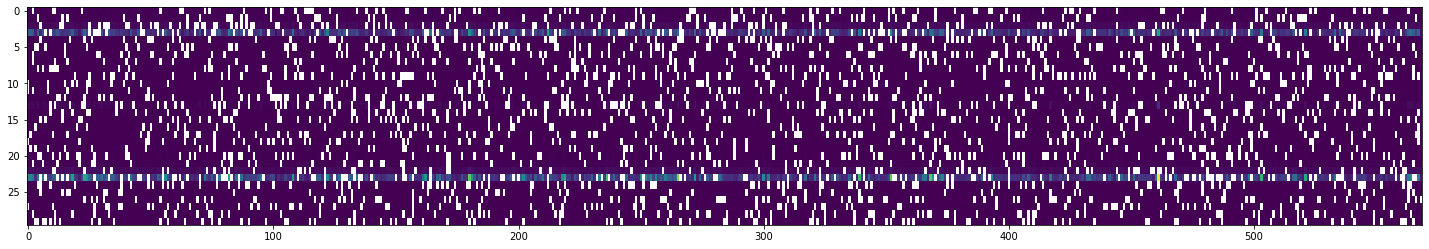

In [4]:
fig,ax = plt.subplots(figsize=(25,4))
ax.imshow(masked.T.values,interpolation='none',aspect='auto')

- More options for centralization (meanless), rescaling, 
- Important if it is longitodinal

In [5]:
normin,normax = get_rescale(masked.values)
masked_n = set_rescale(masked,normin,normax)
data_n = set_rescale(data,normin,normax)

In [17]:
masked_n

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.027801,0.538783,0.363733,0.593753,0.789415,0.703140,0.731113,0.686364,0.603178,...,0.610409,0.141525,0.750126,0.450698,0.601136,0.616677,0.568610,NaN,0.598462,0.682557
1,0.643144,0.334440,0.611455,0.501591,0.289880,0.171450,0.203608,0.348757,0.379798,0.136229,...,0.596155,0.303571,0.605903,0.435214,0.347553,0.148757,0.192971,0.640717,0.233590,0.363189
2,NaN,0.478838,0.590589,0.449417,0.514309,0.423841,NaN,NaN,0.509596,0.206568,...,0.544258,NaN,0.570686,0.374508,0.483590,0.381154,0.359744,0.837065,NaN,0.347798
3,0.210090,0.442739,0.213412,0.102906,0.811321,NaN,0.565604,0.522863,0.776263,1.000000,...,0.227761,0.385928,0.270893,0.094008,0.915472,0.812734,0.548642,0.887013,1.000000,NaN
4,0.629893,NaN,0.627285,0.489290,0.430351,NaN,0.463918,0.518390,NaN,0.181992,...,NaN,0.123934,0.569009,0.341575,NaN,0.166732,0.319489,0.559766,0.157500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.526141,0.676932,0.566490,0.526948,0.287179,0.571462,0.690358,0.336364,0.126907,...,0.612967,0.383262,0.646710,0.452664,NaN,0.172886,0.328035,0.763348,NaN,0.172189
565,0.622320,0.769295,0.599223,0.474019,0.407782,NaN,0.337395,0.486630,NaN,NaN,...,0.548644,NaN,0.584661,NaN,0.300007,NaN,0.256789,0.560799,0.198502,NaN
566,0.455251,NaN,0.434451,0.303118,0.288165,0.244937,NaN,0.263519,0.267677,0.132203,...,0.376508,0.589019,0.426463,NaN,0.282177,0.268717,NaN,0.488460,0.128721,0.247542
567,0.644564,0.814108,0.663261,0.475716,0.588336,0.787551,0.823336,0.755467,0.675253,NaN,...,0.623566,0.730277,0.750126,0.402035,0.619626,0.814493,0.749760,0.912849,0.497142,0.737067


In [19]:
imp = Imputer(masked_n,'LR',loss_f=None,fill_method='random',save_history=True)
imp.impute(10,inds=None)

100%|██████████| 300/300 [00:29<00:00, 10.10it/s]


In [23]:
# data_n.to_csv('../sample_data/sample_truth.csv',index=0)

In [8]:
imp.save('./')

<AxesSubplot:>

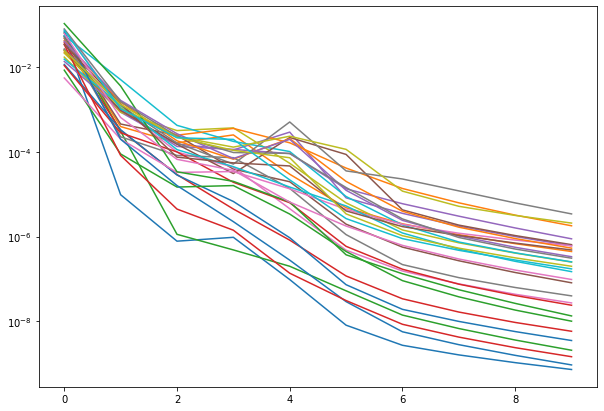

In [8]:
imp.plot_loss_frame()

In [ ]:
# read about pmm 

In [31]:
imp.models['mean texture'].coef_

array([ 19.76920468, -27.69624627,   6.68388785,   0.9691989 ,
         2.77701019,   0.68819474,  -1.04045019,  -0.54284942,
         0.61960217,  -0.20111839,  -0.64904909,  -4.80767351,
         5.68500867,   1.12748678,   0.08284832,  -4.70458257,
         1.41709166,  -0.43850543,   1.22821591,   1.32426191,
         1.45099066,   6.49848898,  -7.65386339,  -1.51391263,
        -1.83265947,   2.49053703,  -0.73519361,   0.8203415 ,
        -0.92049626])

In [20]:
# imp.models['mean texture'] = 
{'mean radius': LinearRegression(),
 'mean texture': LinearRegression(),
 'mean perimeter': LinearRegression(),
 'mean area': LinearRegression(),
 'mean smoothness': LinearRegression(),
 'mean compactness': LinearRegression(),
 'mean concavity': LinearRegression(),
 'mean concave points': LinearRegression(),
 'mean symmetry': LinearRegression(),
 'mean fractal dimension': LinearRegression(),
 'radius error': LinearRegression(),
 'texture error': LinearRegression(),
 'perimeter error': LinearRegression(),
 'area error': LinearRegression(),
 'smoothness error': LinearRegression(),
 'compactness error': LinearRegression(),
 'concavity error': LinearRegression(),
 'concave points error': LinearRegression(),
 'symmetry error': LinearRegression(),
 'fractal dimension error': LinearRegression(),
 'worst radius': LinearRegression(),
 'worst texture': LinearRegression(),
 'worst perimeter': LinearRegression(),
 'worst area': LinearRegression(),
 'worst smoothness': LinearRegression(),
 'worst compactness': LinearRegression(),
 'worst concavity': LinearRegression(),
 'worst concave points': LinearRegression(),
 'worst symmetry': LinearRegression(),
 'worst fractal dimension': LinearRegression()}

{'mean radius': LinearRegression(),
 'mean texture': LinearRegression(),
 'mean perimeter': LinearRegression(),
 'mean area': LinearRegression(),
 'mean smoothness': LinearRegression(),
 'mean compactness': LinearRegression(),
 'mean concavity': LinearRegression(),
 'mean concave points': LinearRegression(),
 'mean symmetry': LinearRegression(),
 'mean fractal dimension': LinearRegression(),
 'radius error': LinearRegression(),
 'texture error': LinearRegression(),
 'perimeter error': LinearRegression(),
 'area error': LinearRegression(),
 'smoothness error': LinearRegression(),
 'compactness error': LinearRegression(),
 'concavity error': LinearRegression(),
 'concave points error': LinearRegression(),
 'symmetry error': LinearRegression(),
 'fractal dimension error': LinearRegression(),
 'worst radius': LinearRegression(),
 'worst texture': LinearRegression(),
 'worst perimeter': LinearRegression(),
 'worst area': LinearRegression(),
 'worst smoothness': LinearRegression(),
 'worst c

No handles with labels found to put in legend.


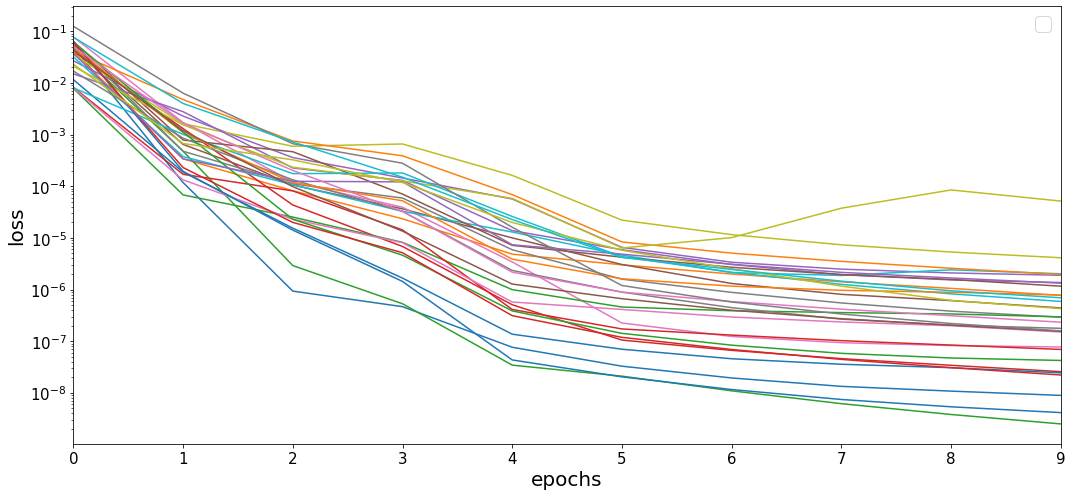

In [10]:
fig,ax = plt.subplots(figsize=(15,7))
ax = imp.plot_loss_frame(ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlim(0,imp.loss_frame.shape[0]-1)
ax.set_xlabel('epochs', fontsize=20)
ax.set_ylabel('loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yscale('log')
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig('loss.jpg',dpi=100)

<AxesSubplot:>

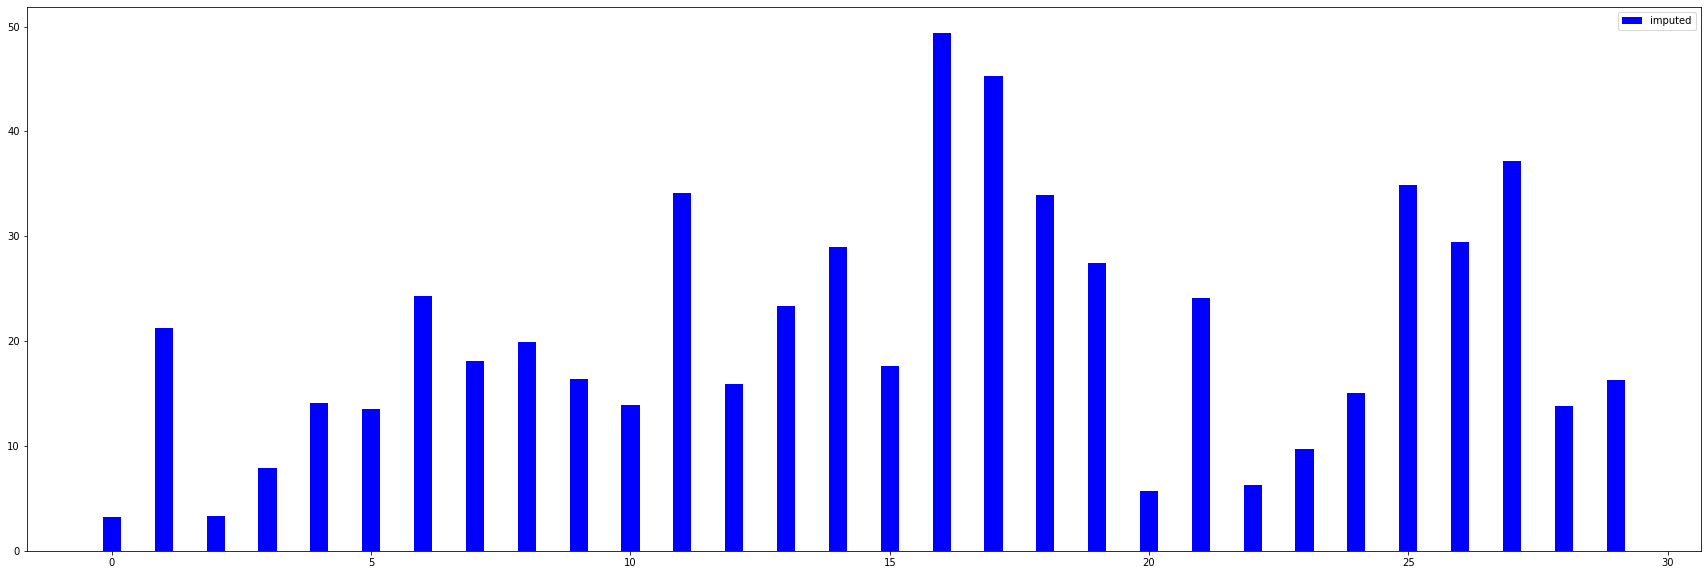

In [21]:
imp.compare(data_n,com_f=mape,with_random=False,save=None) # compaer_with ='random'
# TODO: Taking care of categorical values
# TODO: GPU running, rapids, cudf, cuml
# TODO: more advaned models
# TODO: 

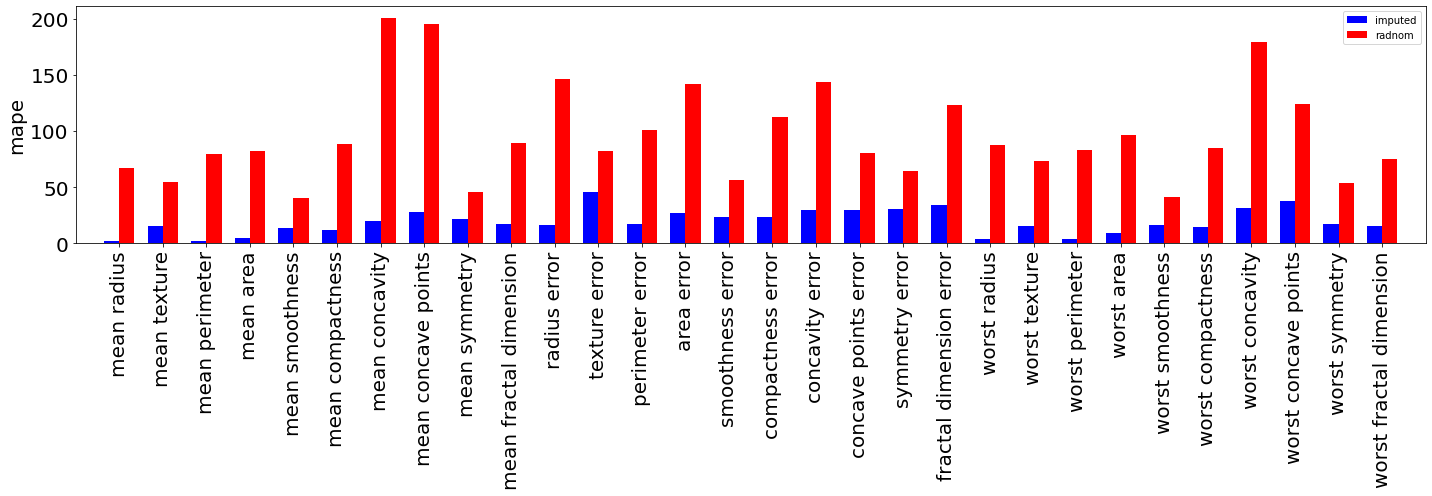

In [12]:
fig,ax = plt.subplots(figsize=(20,7))

imp.compare(data_n,com_f=mape,ax=ax,with_random=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mape', fontsize=20)
ax.set_xticks(np.arange(imp.ncol))
ax.set_xticklabels(imp.cols,rotation=90)
ax.set_xlim(-1,imp.ncol)
# ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
# ax.legend(fontsize=20)
plt.tight_layout()

((0.3142126934544938, 0.09477258743906478, 0.6605139855175353),
 (0.31613007360846124, 0.1057795796044457, 0.662335060281592))

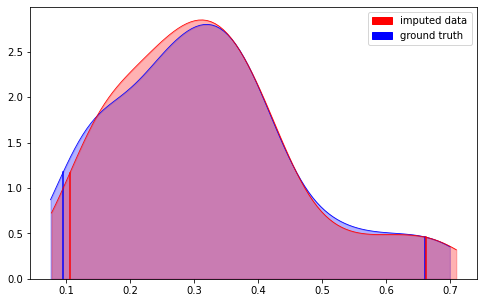

In [28]:
imp.dist('mean radius',truth=data_n,cl=95,bandwidth=0.05)

Add automatic bandwidth selection

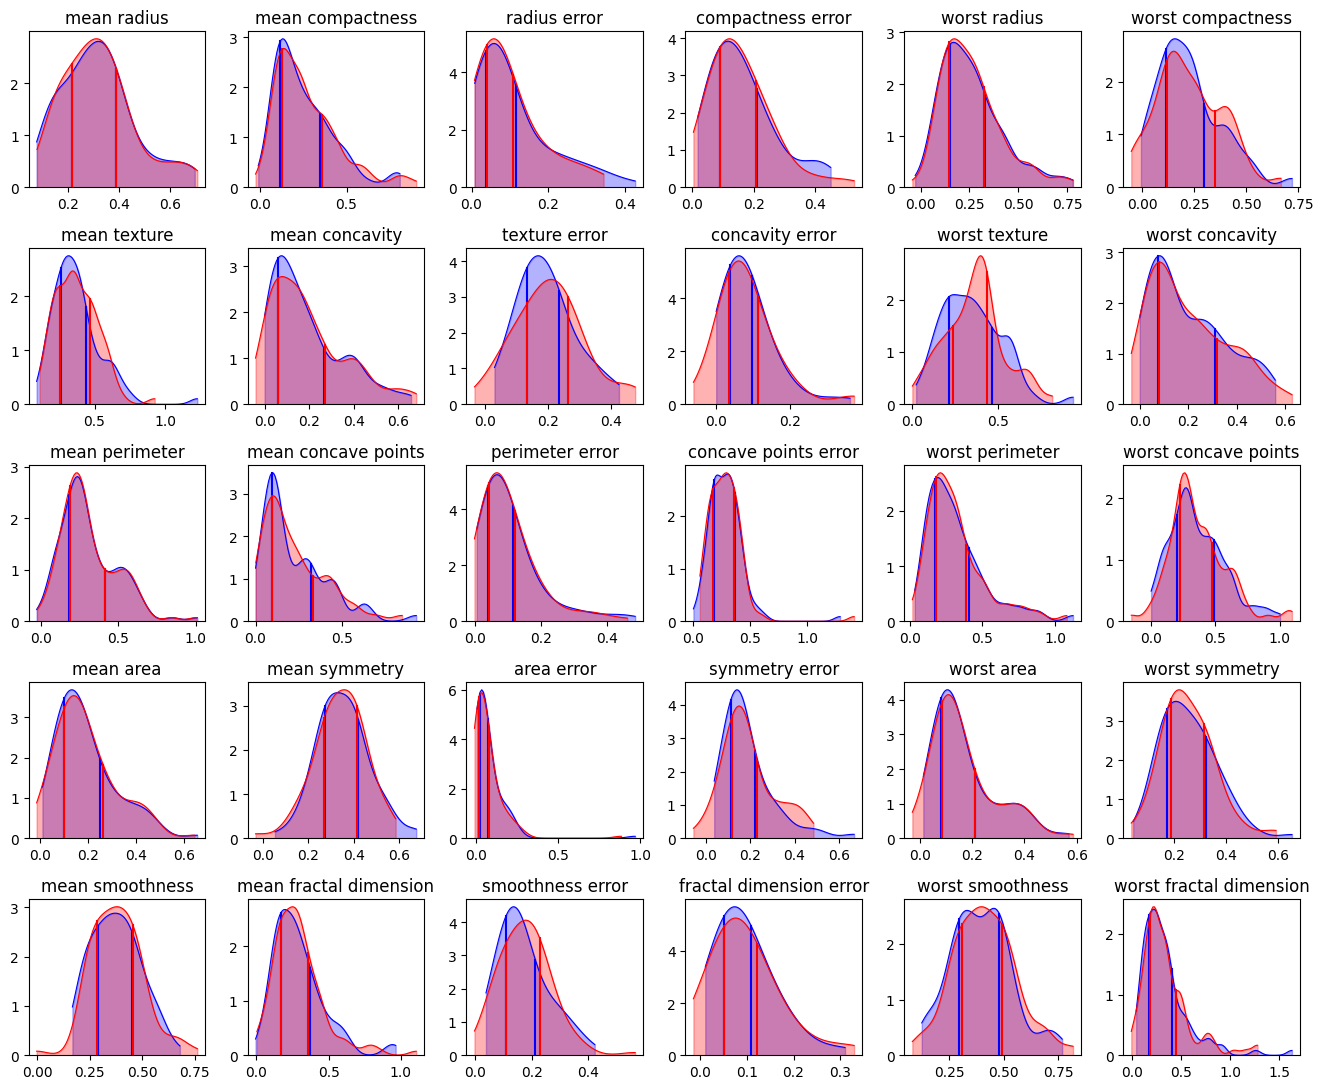

In [29]:
imp.dist_all(data_n,cl=50,bandwidth=0.05)

Adding number of tries and point estimation analysis

In [15]:
imp.general_report(data_n)

,rmse,mape,r2_score,ttest,mape_q1,mape_q2,mape_q3,mape_q4
0,0.012046,1.788776,0.996119,0.984021,1.970608,1.357720,1.299612,2.247101
1,0.058905,15.705299,0.792303,0.919248,33.477183,6.658879,12.198921,12.193467
2,0.010397,1.787941,0.994789,0.995908,2.443460,0.773806,1.328554,2.051724
3,0.016981,5.123795,0.987847,0.948636,8.763661,4.389798,4.554635,2.718900
4,0.064746,13.796098,0.757661,0.431440,24.257690,11.215102,8.920850,10.190172
5,0.037490,11.560125,0.942713,0.918141,17.410897,8.128199,8.876404,8.488181
6,0.042066,20.133066,0.953671,0.798265,37.647770,15.449802,9.297032,7.554262
7,0.041192,27.827348,0.955882,0.781433,39.486328,15.640484,10.913488,7.276721
8,0.099651,21.564559,0.366394,0.379637,25.954195,26.327210,13.219828,17.447234
9,0.050422,16.919486,0.915832,0.893353,22.194864,13.104235,13.255752,8.381530


In [16]:
imp.load('./')

In [3]:
if not in_notebook():
    import argparse
    parser = argparse.ArgumentParser(description='MODEL ACTIVITY ANALYZER.')
    parser.add_argument('--dataset', default='./dataset', type=str, help='path to dataset')
    parser.add_argument('--fillm', default='random', type=str, help='filling initiation')
    parser.add_argument('--mlm', default='LR', type=str, help='ML method')
    parser.add_argument('--nl', default=4, type=int, help='NN # of layers')
    parser.add_argument('--batchnorm', default=0, type=int, help='batch norm layer for NN')
    parser.add_argument('--dropout', default=0.0, type=float, help='dropout layer for NN')
    parser.add_argument('--iterate', default=0, type=int, help='# iteration')
    parser.add_argument('--dtime', default=0, type=int, help='data section time')
    parser.add_argument('--prefix', default='', type=str, help='prefix')
    
    args = parser.parse_args()
    data_path = args.dataset
    fill_method = args.fillm
    mlm = args.mlm
    nlayer = args.nl
    batchnorm = args.dropout
    dropout = args.dropout
    n_iterate = args.iterate
    dtime = args.dtime
    prefix = args.prefix

else:
    data_path = '../jiang/SimulationLabData/data/'
    fill_method='random'
    mlm = 'LR'
    nlayer = 4
    batchnorm = 1
    dropout = 0.1
    n_iterate = 10
    dtime = 1
    prefix = ''

if dtime<2:
    dtime = '_'+str(dtime)
elif dtime==2:
    dtime = ''
else:
    assert 0,'dtime is not recognized!'

realization = '2nd'


if mlm in skmodels.keys():
    prefix = prefix+'{}-{}'.format(fill_method,mlm)
    kargs = {}
    model_ = skmodels[mlm]
elif mlm=='NN':
    prefix = prefix+'{}-NN-nl{}-bt{}-do{}'.format(fill_method,nlayer,batchnorm,dropout)
    kargs = {'epochs':3,'verbose':0}

    def model_():
        return dense_model(inp=44,
                           out=1,
                           nlayer=nlayer,
                           batchnorm=batchnorm,
                           dropout=dropout,
                           loss='mean_squared_error',
                           optimizer='adam',
                           kernel_initializer='normal')
    
    model = model_()
    model.summary()
else:
    assert 0,'model not regognized!'

# Path('results2').mkdir(parents=True, exist_ok=True)
# Path('results2/'+prefix).mkdir(parents=True, exist_ok=True)

model_path = 'results/'+prefix+'/'

data = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'data').drop(columns=['PT_ID'])
masked = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'masked').drop(columns=['PT_ID'])

normin,normax = get_rescale(masked.values)
masked_n = set_rescale(masked,normin,normax)
data_n = set_rescale(data,normin,normax)

imp = Imputer(masked_n,model_,loss_f=None,fill_method=fill_method,save_history=True)
if os.path.exists(model_path+'model.pkl'):
    imp.load(model_path)

imp.impute(n_iterate,inds=None,**kargs)
imp.save(model_path)


No handles with labels found to put in legend.


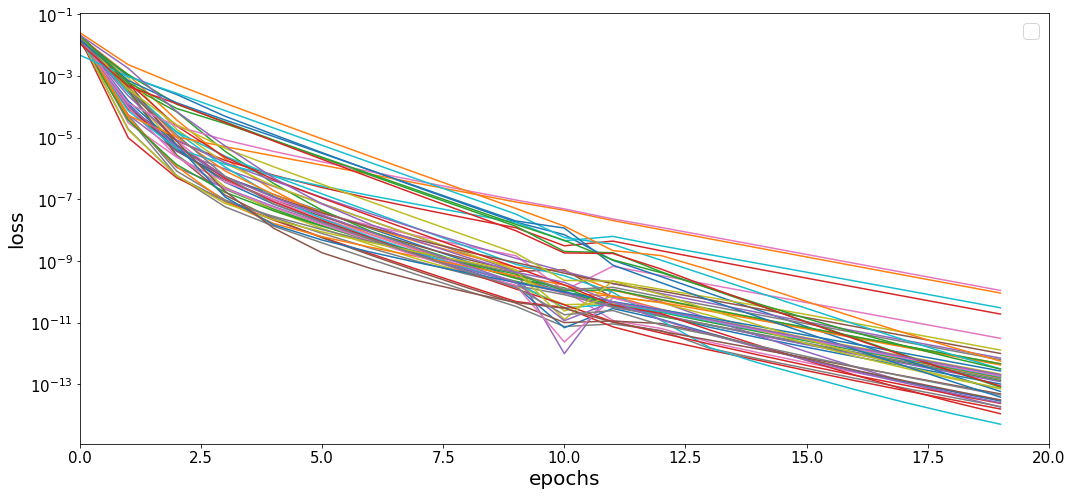

In [18]:
fig,ax = plt.subplots(figsize=(15,7))
ax = imp.plot_loss_frame(ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlim(0,imp.loss_frame.shape[0])
ax.set_xlabel('epochs', fontsize=20)
ax.set_ylabel('loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yscale('log')
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'loss.jpg',dpi=100)

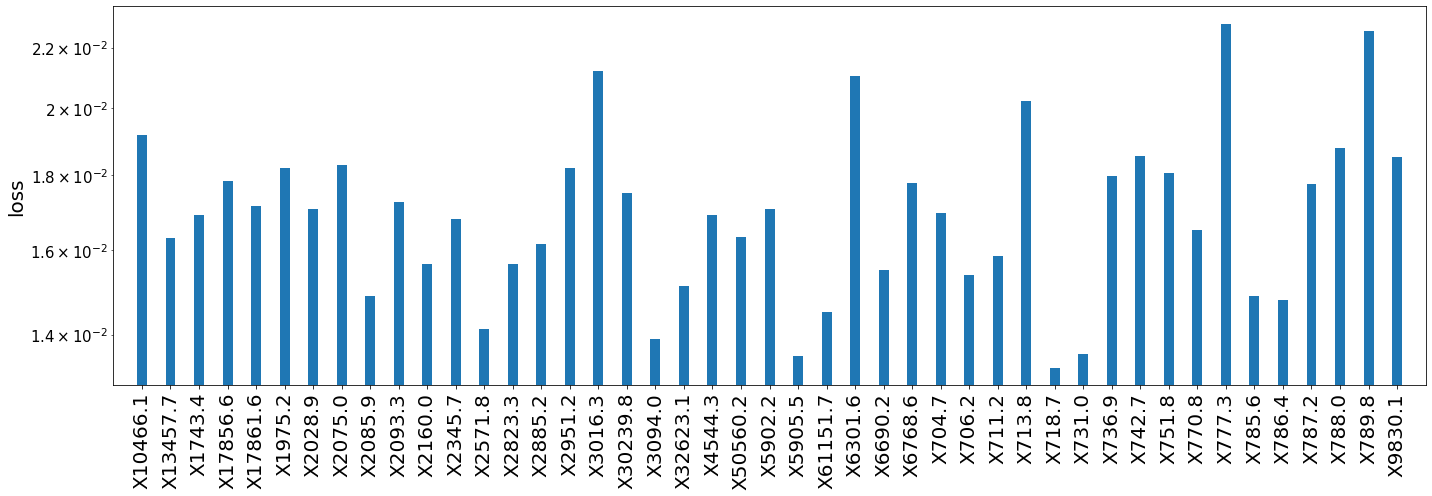

In [22]:
fig,ax = plt.subplots(figsize=(20,7))

imp.compare(data_n,ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('loss', fontsize=20)
ax.set_xticks(np.arange(imp.ncol))
ax.set_xticklabels(imp.cols,rotation=90)
ax.set_xlim(-1,imp.ncol)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
# ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'labs.jpg',dpi=100)